In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_ind
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('train.csv').set_index('Id')

In [4]:
#Conociendo el dataset
df.shape

(1460, 80)

In [5]:
#Conociendo el dataset
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
#Buscando columnas con muchos nulos
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#Borrando columnas con muchos nulos
drop_cols = list(null_cols[null_cols > 689].index)
df = df.drop(drop_cols, axis=1)

In [8]:
#Nuevo shape despues de borrar
df.shape

(1460, 75)

In [9]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500


In [10]:
#Conociendo las columnas numericas
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
#Conociendo las columnas numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
#Creando lista con el nombre de las columnas
col_names = list(df.columns)

In [13]:
col_names

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',

In [14]:
#identificando columnas de baja varianza
low_variance = []
 
for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)
 
print(low_variance)

['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [15]:
#borrando columnas de baja varianza
df = df.drop(low_variance, axis=1)

In [16]:
#nuevo shape
df.shape

(1460, 69)

In [17]:
#Buscando outliers
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,50.00
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,21.00
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,4048.00
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,2.00
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,1.00
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,46.00
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,37.00
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,166.00
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,712.25
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,0.00


In [18]:
#Creando DF con los outliers
outliers = pd.DataFrame(columns=df.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = df[(df[col] < lower) | 
                   (df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

In [19]:
#son demasiados, no los voy a borrar
outliers.shape

(1350, 70)

In [20]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 69, dtype: object

In [21]:
#Llenando valores nan con 0 en la columna de LotFrontage, asumo que son depas y tienen 0 patio frontal
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [22]:
#shape final
df.shape

(1460, 69)

In [23]:
#Viendo correlaciones entre las columnas numericas, sobre todo contra el valor de venta (SalePrice)
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.013585,-0.021407,-0.084284
LotFrontage,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105255,0.076670,-0.009312,...,0.044018,0.044045,0.165229,0.201473,-0.016780,0.069605,0.027366,0.018942,-0.012094,0.209624
LotArea,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.105255,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,-0.009312,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.015211,0.031706,-0.011378


In [24]:
#identificando columnas numericas y creando un df con ellas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [25]:
newdf.shape

(1460, 31)

In [26]:
newdf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,2003.0,2,548,0,61,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,1976.0,2,460,298,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,2001.0,2,608,0,42,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,1998.0,3,642,0,35,272,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,2000.0,3,836,192,84,0,12,2008,250000


In [27]:
newdf.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

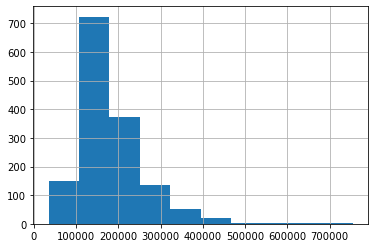

In [28]:
#Empiezo a visualizar los datos con matplotlib
newdf.SalePrice.hist();

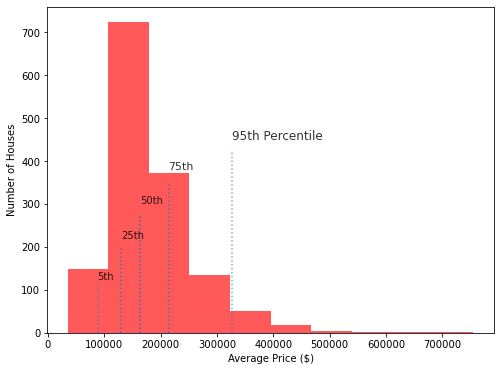

In [123]:
fig, ax = plt.subplots(figsize = (8,6))
newdf.SalePrice.plot(kind = "hist", alpha = 0.65, color='r')

# X #
ax.set_xlabel("Average Price ($)")

# Y #
ax.set_ylabel("Number of Houses")

# Overall #
#ax.set_title("House Prices Project")

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = newdf.SalePrice.quantile(0.05), newdf.SalePrice.quantile(0.25), newdf.SalePrice.quantile(0.5), newdf.SalePrice.quantile(0.75), newdf.SalePrice.quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

ax.text(quant_5-1, 125, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-.1, 220, "25th", size = 10, alpha = 0.8)
ax.text(quant_50-.13, 300, "50th", size = 10, alpha = 0.8)
ax.text(quant_75-.13, 380, "75th", size = 11, alpha = 0.8)
ax.text(quant_95-.25, 450, "95th Percentile", size = 12, alpha =0.8)
    
plt.show()

In [126]:
newdf.SalePrice.describe().round()

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

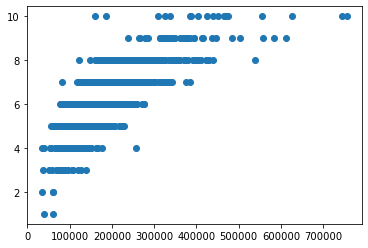

In [30]:
#Clara relación entre el precio de venta y la calidad
plt.scatter(df.SalePrice,df.OverallQual);

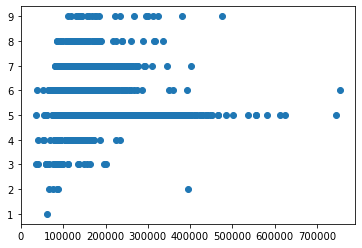

In [31]:
#también hay relación entre el precio de venta y la condición
plt.scatter(df.SalePrice,df.OverallCond);

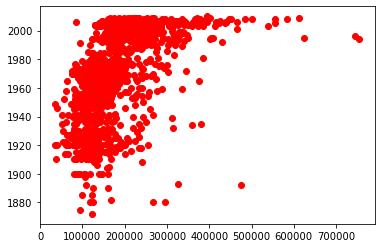

In [127]:
#y también entre el precio de venta y el año de construcción
plt.scatter(df.SalePrice,df.YearBuilt, color='r');

In [33]:
"""Por lo visto en las correlaciones y gráficos de dispersión 
   me quedo con estas columnas como las más importantes para el precio de ventas"""

df_2 = df[['LotArea', 'Utilities', 'OverallQual', 
           'OverallCond', 'YearRemodAdd', 'YearBuilt', 'YrSold', 'SalePrice', 'MasVnrArea', ]].copy()

In [34]:
df_2.head(1)

,LotArea,Utilities,OverallQual,OverallCond,YearRemodAdd,YearBuilt,YrSold,SalePrice,MasVnrArea
Id,,,,,,,,,
1,8450,AllPub,7,5,2003,2003,2008,208500,196.0


In [35]:
#De esas columnas tomo las continuas para hacer una prueba de correlación Pearson
df_pearson = df[['LotArea', 'YearBuilt', 'YrSold', 'YearRemodAdd', 'MasVnrArea', 'SalePrice']].copy()

In [36]:
corr = df_pearson.corr()
corr.style.background_gradient(cmap='coolwarm')

,LotArea,YearBuilt,YrSold,YearRemodAdd,MasVnrArea,SalePrice
LotArea,1.000000,0.014228,-0.014261,0.013788,0.104160,0.263843
YearBuilt,0.014228,1.000000,-0.013618,0.592855,0.315707,0.522897
YrSold,-0.014261,-0.013618,1.000000,0.035743,-0.008201,-0.028923
YearRemodAdd,0.013788,0.592855,0.035743,1.000000,0.179618,0.507101
MasVnrArea,0.104160,0.315707,-0.008201,0.179618,1.000000,0.477493
SalePrice,0.263843,0.522897,-0.028923,0.507101,0.477493,1.000000


In [37]:
#Con las otras hago una prueba de correlación Spearman
df_spearman = df[['OverallQual', 'OverallCond', 'SalePrice']].copy()
corr_spearman = df_spearman.corr('spearman')
corr_spearman.style.background_gradient(cmap='coolwarm')

,OverallQual,OverallCond,SalePrice
OverallQual,1.000000,-0.177521,0.809829
OverallCond,-0.177521,1.000000,-0.129325
SalePrice,0.809829,-0.129325,1.000000


In [38]:
#Con la función que crea el heatmap que nos mostró Julian
def correlation_plot(corr, title="Heatmap"):
  mask = np.zeros_like(df_pearson.corr(), dtype=np.bool)
  # Nos regresa la matriz diagonal superior
  mask[np.triu_indices_from(mask)] = True
  plt.subplots(figsize=(10,8))
  cmap = sns.diverging_palette(6,255, as_cmap=True)
  chart = sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, linewidth = .5, annot = True)
  plt.title(title, fontsize=15)
  return chart

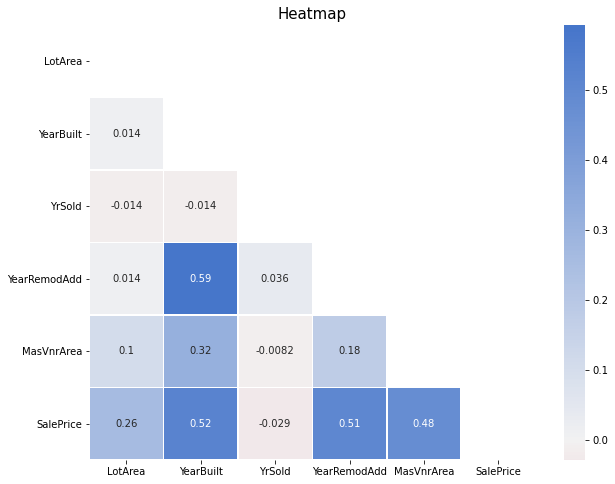

In [39]:
correlation_plot(df_pearson.corr());

In [40]:
#Idem
def correlation_plot_2(corr, title="Heatmap"):
  mask = np.zeros_like(df_spearman.corr(), dtype=np.bool)
  # Nos regresa la matriz diagonal superior
  mask[np.triu_indices_from(mask)] = True
  plt.subplots(figsize=(10,8))
  cmap = sns.diverging_palette(6,255, as_cmap=True)
  chart = sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, linewidth = .5, annot = True)
  plt.title(title, fontsize=15)
  return chart

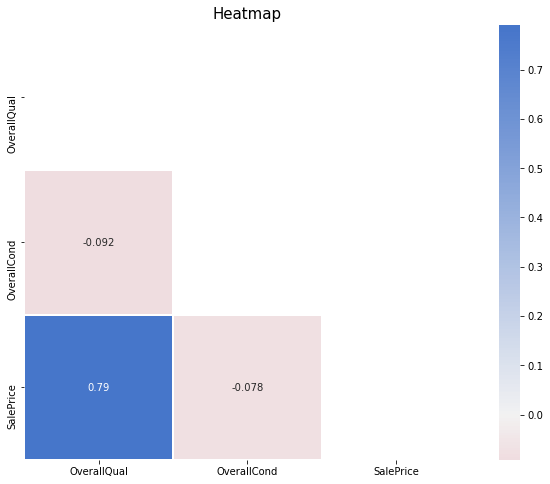

In [41]:
correlation_plot_2(df_spearman.corr());

In [42]:
#Creo dos grupos para probar la hipotesis de que las casas de mejor calidad son más costosas
df_HighQual = df[df['OverallQual'] > 5 ].copy()
df_LowQual = df[df['OverallQual'] <= 5 ].copy()

In [43]:
df_HighQual.shape

(922, 69)

In [44]:
df_LowQual.shape

(538, 69)

In [45]:
df_HighQ = df_HighQual[['SalePrice']].copy()
df_LowQ = df_LowQual[['SalePrice']].copy()

In [46]:
#El P value es microscopico, la hipotesis de que las casas de mejor calidad son más caras se confirma
ttest_ind(df_HighQ.SalePrice, df_LowQ.SalePrice)

Ttest_indResult(statistic=23.978180675989137, pvalue=2.2277449370853986e-107)

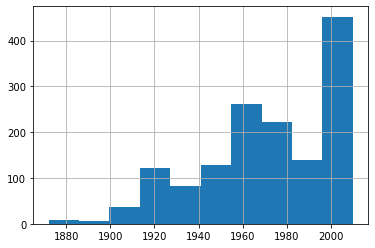

In [47]:
df.YearBuilt.hist();

In [48]:
#Igual voy a comprobar si las casas construidas luego de 1990 son más costosas
df_Older = df[df['YearBuilt'] < 1990 ].copy()
df_Newer = df[df['YearBuilt'] >= 1990 ].copy()

In [49]:
df_O = df_Older[['SalePrice']].copy()
df_N = df_Newer[['SalePrice']].copy()

In [50]:
print(df_O.SalePrice.mean())
print(df_N.SalePrice.mean())

146148.14411441144
238287.26497277676


In [51]:
#Las casas más nuevas son más caras, el P value lo confirma
ttest_ind(df_O.SalePrice, df_N.SalePrice)

Ttest_indResult(statistic=-25.97099401941119, pvalue=1.547160239369537e-122)

In [52]:
#Ahora probando casas remodeladas antes y despues de 1990
df_RemodOld = df[df['YearRemodAdd'] < 1990 ].copy()
df_RemodNew = df[df['YearRemodAdd'] >= 1990 ].copy()

In [53]:
df_RO = df_RemodOld[['SalePrice']].copy()
df_RN = df_RemodNew[['SalePrice']].copy()

In [54]:
#También se confirma que las casas remodeladas despues de 1990 son más costosas
ttest_ind(df_RO.SalePrice, df_RN.SalePrice)

Ttest_indResult(statistic=-20.166546730240043, pvalue=5.710293853357072e-80)

In [55]:
#Regresión lineal entre esos 3 factores y el precio de ventas
X = sm.add_constant(df[['OverallQual', 'YearBuilt', 'YearRemodAdd']])
Y = df.SalePrice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     848.3
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          6.18e-319
Time:                        17:31:33   Log-Likelihood:                -17806.
No. Observations:                1460   AIC:                         3.562e+04
Df Residuals:                    1456   BIC:                         3.564e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.01e+06   1.47e+05     -6.853   

In [56]:
#Elimino un par de columnas más para hacer un PCA
null_cols = newdf.isnull().sum()
null_cols[null_cols > 0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [57]:
#Elimino un par de columnas más para hacer un PCA
drop_cols = list(null_cols[null_cols > 1].index)
newdf = newdf.drop(drop_cols, axis=1)

In [58]:
newdf.shape

(1460, 29)

In [59]:
#Aplico la estandarización de los datos
x = StandardScaler().fit_transform(newdf)
x_norm = pd.DataFrame(x)
x_norm.head(1)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.073375,0.212877,-0.207142,0.651479,-0.5172,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,0.91221,-0.951226,0.311725,0.351,-0.752176,0.216503,-0.359325,-1.599111,0.138777,0.347273


In [60]:
#Procedo con el PCA
pca = PCA()
principal_components = pca.fit_transform(x)

In [61]:
pca.explained_variance_ratio_

array([2.48359891e-01, 1.08023433e-01, 7.11586645e-02, 7.00708894e-02,
       4.88938550e-02, 4.01576364e-02, 3.70547126e-02, 3.62475998e-02,
       3.43678319e-02, 3.31016029e-02, 3.20998607e-02, 2.89351686e-02,
       2.78036152e-02, 2.55881856e-02, 2.53036830e-02, 2.42661800e-02,
       2.01746677e-02, 1.69098404e-02, 1.44277933e-02, 1.19794285e-02,
       1.02909872e-02, 9.26862463e-03, 6.85108073e-03, 5.55092137e-03,
       5.02435451e-03, 4.56654138e-03, 3.40223428e-03, 1.20715773e-04,
       6.28372387e-33])

In [62]:
#Comprobación
sum(pca.explained_variance_ratio_)

0.9999999999999998

In [63]:
#Los primeros 12 hacen el pareto
sum(pca.explained_variance_ratio_[:13])

0.8162747616383554

In [64]:
#Reentreno el modelo con 12 componentes
pca = PCA(n_components = 12)
pca.fit(x)

PCA(n_components=12)

In [65]:
#Creando el DF
df_pca_comp = pd.DataFrame(
    data = pca.components_,
    columns = x_norm.columns.values,
    index = ["Componente 1", "Componente 2",'Componente 3', 'Componente 4', 
    'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8', 
    'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12']
    )
df_pca_comp

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Componente 1,-0.017990,0.098817,0.111153,0.303674,-0.069803,0.220257,0.203274,0.139218,-0.008853,0.115901,...,0.248638,0.190414,0.279103,0.273299,0.133886,0.149546,-0.064962,0.024415,-0.014695,0.332774
Componente 2,0.189404,-0.003774,-0.068859,-0.019444,0.040514,-0.156997,-0.060703,-0.326623,-0.093044,0.125958,...,0.302778,-0.023294,-0.065187,-0.105355,-0.078506,0.034200,0.095813,0.028656,-0.034438,-0.047886
Componente 3,-0.265521,0.219103,0.273601,-0.150943,0.091318,-0.392404,-0.319926,0.087017,0.154125,0.059578,...,0.204670,0.132531,-0.139098,-0.074074,-0.030811,-0.049691,0.261807,0.007281,-0.005251,-0.020243
Componente 4,0.218565,-0.148995,0.132239,-0.061200,0.129554,-0.095374,-0.073554,0.367407,0.145204,-0.569831,...,0.064712,0.155311,-0.077227,-0.062657,0.144967,0.017297,0.024750,-0.043478,0.054904,0.038214
Componente 5,0.372040,-0.023453,-0.094723,-0.112376,-0.451101,0.124647,-0.113845,0.139452,-0.103402,-0.052545,...,0.077297,-0.189542,0.041676,0.026971,-0.086394,-0.129664,-0.101736,-0.023375,0.028683,-0.102185
Componente 6,0.020336,-0.040257,0.034132,-0.009655,-0.170301,-0.004081,-0.163665,0.067853,-0.068500,-0.053204,...,-0.048378,0.104074,0.000703,-0.003782,-0.086059,0.184646,-0.025328,0.618635,-0.694744,-0.017817
Componente 7,0.051041,-0.410024,0.268106,-0.080191,-0.109073,0.100086,-0.044210,-0.252847,0.490222,0.115092,...,0.002050,0.137302,-0.108926,-0.158744,0.421541,-0.048213,-0.350519,0.083788,0.024362,-0.047331
Componente 8,0.248293,-0.212838,-0.132897,0.108027,0.589554,-0.139600,0.323127,0.057634,-0.165563,0.054193,...,0.012666,-0.033788,-0.137211,-0.135080,0.127846,0.071633,0.041893,0.305080,0.035418,0.054704
Componente 9,0.308494,-0.414332,-0.024314,0.137241,-0.162187,-0.095039,-0.121027,-0.070827,0.007328,0.151678,...,-0.101592,0.326594,0.057745,0.035465,-0.051172,-0.061972,0.581367,-0.235976,-0.093050,0.050021
Componente 10,0.089015,0.189613,-0.194892,0.052392,0.061947,0.007686,0.139043,-0.187296,0.742543,-0.104424,...,-0.020780,-0.237879,0.158810,0.174058,-0.185131,0.151778,0.275712,0.149940,-0.006759,-0.006133


In [66]:
#Coloco los nombres de las columnas para mejor análisis
data_pca_comp = pd.DataFrame (data = pca.components_, 
                              columns = newdf.columns.values, 
                              index = ['Componente 1', 'Componente 2', 'Componente 3', 
                                       'Componente 4', 'Componente 5', 'Componente 6', 
                                       'Componente 7', 'Componente 8', 'Componente 9', 
                                       'Componente 10', 'Componente 11', 'Componente 12'])
data_pca_comp

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
Componente 1,-0.017990,0.098817,0.111153,0.303674,-0.069803,0.220257,0.203274,0.139218,-0.008853,0.115901,...,0.248638,0.190414,0.279103,0.273299,0.133886,0.149546,-0.064962,0.024415,-0.014695,0.332774
Componente 2,0.189404,-0.003774,-0.068859,-0.019444,0.040514,-0.156997,-0.060703,-0.326623,-0.093044,0.125958,...,0.302778,-0.023294,-0.065187,-0.105355,-0.078506,0.034200,0.095813,0.028656,-0.034438,-0.047886
Componente 3,-0.265521,0.219103,0.273601,-0.150943,0.091318,-0.392404,-0.319926,0.087017,0.154125,0.059578,...,0.204670,0.132531,-0.139098,-0.074074,-0.030811,-0.049691,0.261807,0.007281,-0.005251,-0.020243
Componente 4,0.218565,-0.148995,0.132239,-0.061200,0.129554,-0.095374,-0.073554,0.367407,0.145204,-0.569831,...,0.064712,0.155311,-0.077227,-0.062657,0.144967,0.017297,0.024750,-0.043478,0.054904,0.038214
Componente 5,0.372040,-0.023453,-0.094723,-0.112376,-0.451101,0.124647,-0.113845,0.139452,-0.103402,-0.052545,...,0.077297,-0.189542,0.041676,0.026971,-0.086394,-0.129664,-0.101736,-0.023375,0.028683,-0.102185
Componente 6,0.020336,-0.040257,0.034132,-0.009655,-0.170301,-0.004081,-0.163665,0.067853,-0.068500,-0.053204,...,-0.048378,0.104074,0.000703,-0.003782,-0.086059,0.184646,-0.025328,0.618635,-0.694744,-0.017817
Componente 7,0.051041,-0.410024,0.268106,-0.080191,-0.109073,0.100086,-0.044210,-0.252847,0.490222,0.115092,...,0.002050,0.137302,-0.108926,-0.158744,0.421541,-0.048213,-0.350519,0.083788,0.024362,-0.047331
Componente 8,0.248293,-0.212838,-0.132897,0.108027,0.589554,-0.139600,0.323127,0.057634,-0.165563,0.054193,...,0.012666,-0.033788,-0.137211,-0.135080,0.127846,0.071633,0.041893,0.305080,0.035418,0.054704
Componente 9,0.308494,-0.414332,-0.024314,0.137241,-0.162187,-0.095039,-0.121027,-0.070827,0.007328,0.151678,...,-0.101592,0.326594,0.057745,0.035465,-0.051172,-0.061972,0.581367,-0.235976,-0.093050,0.050021
Componente 10,0.089015,0.189613,-0.194892,0.052392,0.061947,0.007686,0.139043,-0.187296,0.742543,-0.104424,...,-0.020780,-0.237879,0.158810,0.174058,-0.185131,0.151778,0.275712,0.149940,-0.006759,-0.006133


In [67]:
"""12 componentes, con sus respectivos coeficientes explican el valor de las casas, 
    que va a estar dado por multiplicar el coeficiente de cada componente
    por el valor que tiene cada casa en ese componente"""

pca.explained_variance_ratio_[:13]

array([0.24835989, 0.10802343, 0.07115866, 0.07007089, 0.04889385,
       0.04015762, 0.03705466, 0.0362476 , 0.03436781, 0.03310155,
       0.03209986, 0.02893414])

In [68]:
#FIN